In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import calendar
from pprint import pprint

file2019 = "2019.csv"
file2020 = "2020.csv"

crime_data2019 = pd.read_csv(file2019,low_memory=False)
crime_data2020 = pd.read_csv(file2020,low_memory=False)



In [2]:
# Save necessary data from main data set for charts

crime_data_selection_2019 = crime_data2019[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2019 = crime_data_selection_2019.copy()
crime_data_selection_2019["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2019["Occurred Date"]).month
crime_data_selection_2019["Month Occurred"] = crime_data_selection_2019["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2019 = crime_data_selection_2019[["Highest Offense Description","Month Occurred"]]

crime_data_selection_2020 = crime_data2020[["Incident Number", "Highest Offense Description", "Highest Offense Code", "Family Violence", "Occurred Date", "Occurred Time", "Report Date Time", "Location Type", "Address", "Zip Code"]]
crime_data_selection_2020 = crime_data_selection_2020.copy()
crime_data_selection_2020["Month Occurred"] = pd.DatetimeIndex(crime_data_selection_2020["Occurred Date"]).month
crime_data_selection_2020["Month Occurred"] = crime_data_selection_2020["Month Occurred"].apply(lambda x: calendar.month_name[x])
crime_data_selection_months_2020 = crime_data_selection_2020[["Highest Offense Description","Month Occurred"]]




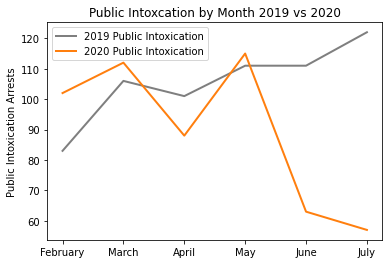

In [3]:
# Calculate public intoxication by month

intox2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("PUBLIC INTOX")]
summary_intox_by_month_2019 = intox2019bymonth.groupby("Month Occurred").count()


intox2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("PUBLIC INTOX")]
summary_intox_by_month_2020 = intox2020bymonth.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_intox_by_month_2019 = summary_intox_by_month_2019.reindex(month_order, axis=0)
summary_intox_by_month_2020 = summary_intox_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_intox_by_month_2019,label='2019 Public Intoxication', linewidth=2, color='tab:gray')
plt.plot(summary_intox_by_month_2020,label='2020 Public Intoxication', linewidth=2, color='tab:orange')
plt.legend()
plt.ylabel("Public Intoxication Arrests")
plt.title("Public Intoxcation by Month 2019 vs 2020")
plt.savefig('intoxline.png')
plt.show()

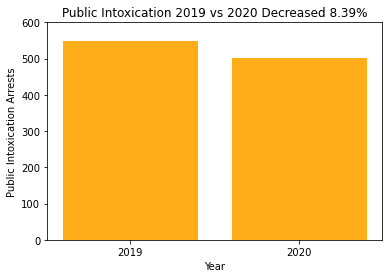

In [4]:
# Generate public intoxication bar graph 2019 vs 2020

intox2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("INTOXICATION")]
intox2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("INTOXICATION")]

intox_count2019 = intox2019["Address"].count()
intox_count2020 = intox2020["Address"].count()

counts =[intox_count2019,intox_count2020]
x_axis = np.arange(len(counts))

intoxdec = ((intox_count2019)-(intox_count2020)) / (intox_count2019)
                                          
plt.bar(x_axis, counts, color='orange', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,600)
plt.title(f"Public Intoxication 2019 vs 2020 Decreased {round(intoxdec * 100,2)}%")
plt.xlabel("Year")
plt.ylabel("Public Intoxication Arrests")
plt.savefig('intoxbar.png')
plt.show()

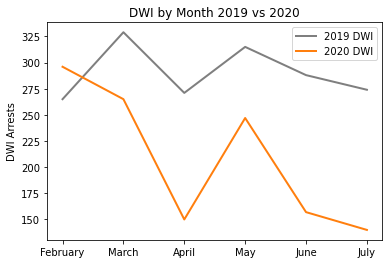

In [5]:
# Calculate DWI/DUI by month



DWI2019bymonth = crime_data_selection_months_2019[crime_data_selection_months_2019['Highest Offense Description'].str.contains("DWI")]
summary_DWI_by_month_2019 = DWI2019bymonth.groupby("Month Occurred").count()


DWI2020bymonth = crime_data_selection_months_2020[crime_data_selection_months_2020['Highest Offense Description'].str.contains("DWI")] 
summary_DWI_by_month_2020 = DWI2020bymonth.groupby("Month Occurred").count()


month_order = ['February', 'March', 'April', 'May', 'June', 'July']
summary_DWI_by_month_2019 = summary_DWI_by_month_2019.reindex(month_order, axis=0)
summary_DWI_by_month_2020 = summary_DWI_by_month_2020.reindex(month_order, axis=0)

plt.plot(summary_DWI_by_month_2019,label='2019 DWI', linewidth=2, color='tab:gray')
plt.plot(summary_DWI_by_month_2020,label='2020 DWI', linewidth=2, color='tab:orange')
plt.legend()
plt.ylabel("DWI Arrests")
plt.title("DWI by Month 2019 vs 2020")
plt.savefig('DWIline.png')
plt.show()

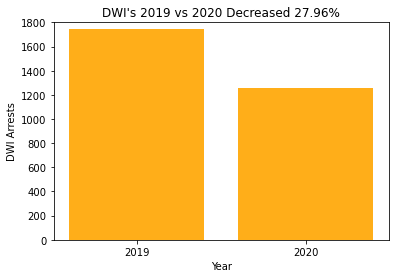

In [6]:
# Generate public intoxication bar graph 2019 vs 2020

DWI2019 = crime_data2019[crime_data2019['Highest Offense Description'].str.contains("DWI")]
DWI2020 = crime_data2020[crime_data2020['Highest Offense Description'].str.contains("DWI")]

DWI_count2019 = DWI2019["Address"].count()
DWI_count2020 = DWI2020["Address"].count()


counts =[DWI_count2019,DWI_count2020]
x_axis = np.arange(len(counts))

DWIdec = ((DWI_count2019)-(DWI_count2020)) / (DWI_count2019)
                                          
plt.bar(x_axis, counts, color='orange', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2019", "2020"])
plt.ylim(0,1800)
plt.title(f"DWI's 2019 vs 2020 Decreased {round(DWIdec * 100,2)}%")
plt.xlabel("Year")
plt.ylabel("DWI Arrests")
plt.savefig('DWIbar.png')
plt.show()